In [1]:
import tensorflow as tf
import numpy as np
from scipy.fft import dctn
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import clone_model
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from numpy.random import default_rng
from tensorflow.keras.models import load_model
from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [3]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [4]:
N = 5  # Adjust this as needed

# Convert train_labels to a 1D array for easier manipulation
train_labels = train_labels.flatten()

# Initialize a list to hold the selected sets
unique_selections = []

# Iterate N times to generate N unique sets
for _ in range(N):
    selected_set = []
    used_indices = set()
    
    # Sample one image for each label (0 through 9)
    for label in range(10):
        # Find indices of all images with the current label
        label_indices = np.where(train_labels == label)[0]
        
        # Filter out indices that have been used in previous selections
        available_indices = list(set(label_indices) - used_indices)
        
        # Randomly choose one index from the available ones
        chosen_index = np.random.choice(available_indices)
        
        # Add the chosen index and image to the selection
        selected_set.append((train_images[chosen_index], train_labels[chosen_index]))
        
        # Mark the index as used
        used_indices.add(chosen_index)
    
    # Add the set of 10 images (one per label) to the unique selections list
    unique_selections.append(selected_set)

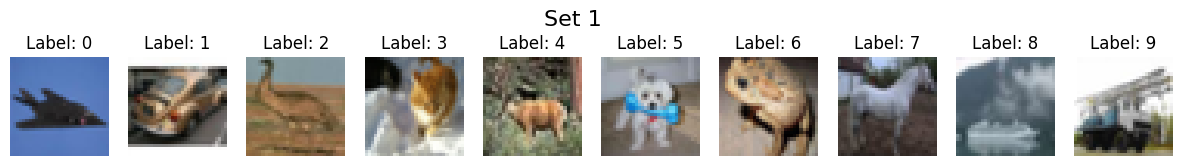

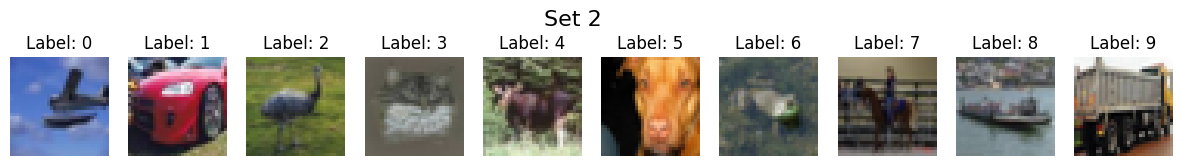

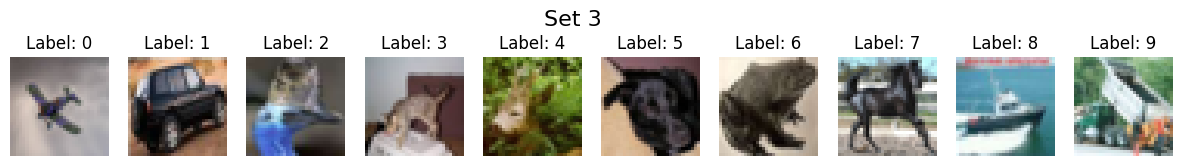

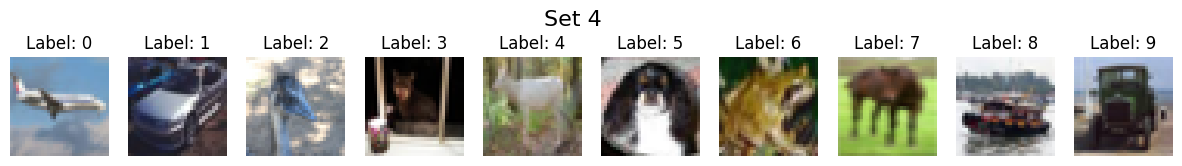

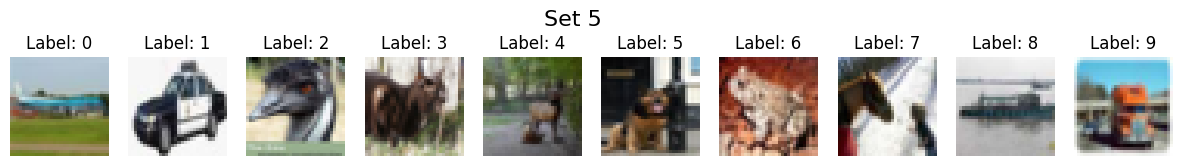

In [5]:
import matplotlib.pyplot as plt

# Function to visualize a set of images (one for each label)
def visualize_set(selected_set, set_index):
    fig, axes = plt.subplots(1, 10, figsize=(15, 2))
    fig.suptitle(f"Set {set_index + 1}", fontsize=16)
    for i, (image, label) in enumerate(selected_set):
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(f"Label: {label}")

# Visualize each unique selection set
for i, selected_set in enumerate(unique_selections):
    visualize_set(selected_set, i)
    plt.show()


In [6]:
# Separate train images and labels from each selection set
all_images = []  # List to store images from each set
all_labels = []  # List to store labels from each set

for selected_set in unique_selections:
    images = [item[0] for item in selected_set]  # Extract images
    labels = [item[1] for item in selected_set]  # Extract labels
    all_images.append(images)
    all_labels.append(labels)

# Now, all_images[i] and all_labels[i] contain the images and labels of the i-th unique set.


In [7]:
all_labels[0]

[np.uint8(0),
 np.uint8(1),
 np.uint8(2),
 np.uint8(3),
 np.uint8(4),
 np.uint8(5),
 np.uint8(6),
 np.uint8(7),
 np.uint8(8),
 np.uint8(9)]

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [9]:
model = Sequential([
        Conv2D(32, (3,3), activation='relu', padding='same', kernel_initializer='he_normal', input_shape=(32,32,3), name='conv1'),
        Conv2D(32, (3,3), activation='relu', padding='same',kernel_initializer='he_normal', name='conv2'),
        MaxPooling2D((2,2), name='pool1'),
        Dropout(0.25),

        Conv2D(64, (3,3), activation='relu', padding='same',kernel_initializer='he_normal', name='conv3'),
        Conv2D(64, (3,3), activation='relu', padding='same',kernel_initializer='he_normal',  name='conv4'),
        MaxPooling2D((2,2), name='pool2'),
        Dropout(0.25),

        Conv2D(128, (3,3), activation='relu', padding='same',kernel_initializer='he_normal',  name='conv5'),
        Conv2D(128, (3,3), activation='relu', padding='same',kernel_initializer='he_normal',  name='conv6'),
        MaxPooling2D((2,2), name='pool3'),
        Dropout(0.25),

        Conv2D(256, (3,3), activation='relu', padding='same',kernel_initializer='he_normal',  name='conv7'),
        MaxPooling2D((2,2), name='pool4'),
        Dropout(0.25),
        #Conv2D(128, (3,3), activation='relu', padding='same', name='conv5'),
        Flatten(name='flatten'),
        Dense(128, activation='relu',kernel_initializer='he_normal', name='fc1'),
        Dense(64, activation='relu',kernel_initializer='he_normal', name='fc2'),
        Dense(10, activation='softmax', name='output')
        ])

/Users/amiruladlilhakim/Documents/VirtualEnv/tensorflow_env/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model_copies = [tf.keras.models.clone_model(model) for _ in range(N)]

In [11]:
for i in range(N):
    model_copies[i].compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model_copies[i].fit(np.array(all_images[i]), np.array(all_labels[i]), epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.2500 - loss: 3.8159 - val_accuracy: 0.0000e+00 - val_loss: 4.5300
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.1250 - loss: 4.0683 - val_accuracy: 0.0000e+00 - val_loss: 3.7593
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.1250 - loss: 3.2918 - val_accuracy: 0.0000e+00 - val_loss: 3.5451
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.1250 - loss: 2.9579 - val_accuracy: 0.0000e+00 - val_loss: 3.5293
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.0000e+00 - loss: 2.3787 - val_accuracy: 0.0000e+00 - val_loss: 3.3716
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.3750 - loss: 1.9805 - val_accuracy: 0.0000e+00 - val_loss: 3.2574
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.2500 - loss: 2.2221 - val_accuracy: 0.0000e+00 - val_loss: 3.1465
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.0000e+00 - loss: 2.1618 - val_a

In [79]:

def get_filters(model, layer_name, filter_indices):
    layer = model.get_layer(name=layer_name)
    filters, biases = layer.get_weights()
    return filters[:, :, :, filter_indices]


def get_all_filters(model, layer_name):
    layer = model.get_layer(name=layer_name)
    filters, biases = layer.get_weights()
    return filters

In [48]:
def properties(model, layer_name, property_name):
    filter_norms = []
    filter_correlation = []
    feature_map_correlation = []
    feature_map_dct = []

    layer = model.get_layer(layer_name)
    filters, biases = layer.get_weights()
    num_filters = filters.shape[-1]

    if property_name == 'filter_norm':
        for i in range(num_filters):
            filt = filters[:, :, :, i]
            filt_matrix = filt.reshape(-1, filt.shape[-1])
            norm = np.linalg.norm(filt_matrix)
            filter_norms.append(norm)
        return filter_norms
    
    elif property_name == 'filter_correlation':
        for i in range(num_filters):
            filt = filters[:, :, :, i]
            filt_matrix = filt.reshape(-1, filt.shape[-1])
            uniqueness = np.linalg.norm(filt_matrix) - np.linalg.norm(get_all_filters(model, layer_name))
            filter_correlation.append(uniqueness)
        return filter_correlation
    
    elif property_name == 'feature_map_correlation':
        intermediate_model = models.Model(inputs=model.input, outputs=model.get_layer(layer_name).output)
        feature_maps = intermediate_model.predict(train_images[:1000])
        for i in range(num_filters):
            U, S, Vt = np.linalg.svd(feature_maps[:,:,:,i])
            feature_map_correlation.append(np.sum(S > 1e-5))
        return feature_map_correlation
    
    elif property_name == 'feature_map_dct':
        intermediate_model = models.Model(inputs=model.input, outputs=model.get_layer(layer_name).output)
        feature_maps = intermediate_model.predict(train_images[:1000])
        for i in range(num_filters):
            feature_map_dct.append(np.sqrt(np.sum(np.abs(dctn(feature_maps, norm='ortho')))) - np.sqrt(np.sum(np.abs(dctn(feature_maps[:,:,:,i], norm='ortho')))) )
        return feature_map_dct

In [49]:
def filter_to_keep(norms, percentage):
    threshold = np.percentile(norms, percentage)
    return [i for i, norm in enumerate(norms) if norm >= threshold]

In [50]:
def keep_filter_in_model(model):
    keep_filters ={}
    for layer in model.layers:
        if 'conv' in layer.name and layer.name != 'conv1' and layer.name != 'conv2':
            norms = properties(model, layer.name, 'filter_norm')
            keep_filters[layer.name] = filter_to_keep(norms, 95)
    return keep_filters

In [51]:
train_images.shape[1:]

(32, 32, 3)

In [52]:
keep_filter_in_model(model_copies[0])

{'conv3': [7, 8, 14, 48],
 'conv4': [0, 8, 34, 53],
 'conv5': [12, 17, 42, 70, 96, 110, 118],
 'conv6': [17, 22, 42, 70, 72, 90, 118],
 'conv7': [0, 3, 11, 47, 95, 147, 157, 159, 162, 177, 219, 223, 227]}

In [53]:
def dict_keep_filters_in_model(model_list):
    dict_keep_filters = {}
    for i, model in enumerate(model_list):
        dict_keep_filters[i] = keep_filter_in_model(model)
    return dict_keep_filters

In [54]:
model_dict = dict_keep_filters_in_model(model_copies)

In [55]:
def get_var_name(var):
    for name, value in locals().items():
        if value is var:
            return name

def copy_weights_pruned(source_model, pruned_target_model, source_layer_names, target_layer_names, keep_filters):
    for source_layer, target_layer in zip(source_model.layers, pruned_target_model.layers):
        if isinstance(source_layer, tf.keras.layers.Conv2D) and source_layer.name not in source_layer_names and target_layer.name not in target_layer_names:
            w, b = source_layer.get_weights()
            target_layer.set_weights([w, b])
        elif source_layer.name in source_layer_names and target_layer.name in target_layer_names:
            for keep_filt in keep_filters:
                if source_layer.name in get_var_name(keep_filt):
                    w, b = source_layer.get_weights()
                    target_layer.set_weights([w[:, :, :, keep_filt], b[keep_filt]])

In [56]:
def change_filters(model, layer_names, new_filter_count):
    new_layers = []
    for layer in model.layers:
        if layer.name in layer_names and isinstance(layer, Conv2D):
            # Get the existing configuration and change the filter count
            config = layer.get_config()
            config['filters'] = new_filter_count
            # Recreate the layer with the new filter count
            new_layer = Conv2D.from_config(config)
            new_layers.append(new_layer)
        else:
            # Keep the original layer if it doesn't match the criteria
            new_layers.append(layer)
    
    # Rebuild the model with the modified layers
    new_model = Sequential(new_layers)
    return new_model

In [57]:
list(model_dict[0].keys())[0]

'conv3'

In [58]:
list(model_dict[0].values())[0]

[7, 8, 14, 48]

In [59]:
def build_pruned_models(model_list, model_dict):
    pruned_models = []
    for i in model_dict:
        pruned_model = Sequential([
        Conv2D(32, (3,3), activation='relu', padding='same',kernel_initializer='he_normal', input_shape=(32,32,3), name='conv1'),
        Conv2D(32, (3,3), activation='relu', padding='same',kernel_initializer='he_normal', name='conv2'),
        MaxPooling2D((2,2), name='pool1'),
        Dropout(0.25),

        Conv2D(len(model_dict[i]['conv3']), (3,3), activation='relu', padding='same',kernel_initializer='he_normal', name='conv3'),
        Conv2D(len(model_dict[i]['conv4']), (3,3), activation='relu', padding='same',kernel_initializer='he_normal',  name='conv4'),
        MaxPooling2D((2,2), name='pool2'),
        Dropout(0.25),

        Conv2D(len(model_dict[i]['conv5']), (3,3), activation='relu', padding='same',kernel_initializer='he_normal',  name='conv5'),
        Conv2D(len(model_dict[i]['conv6']), (3,3), activation='relu', padding='same',kernel_initializer='he_normal',  name='conv6'),
        MaxPooling2D((2,2), name='pool3'),
        Dropout(0.25),

        Conv2D(len(model_dict[i]['conv7']), (3,3), activation='relu', padding='same',kernel_initializer='he_normal',  name='conv7'),
        MaxPooling2D((2,2), name='pool4'),
        Dropout(0.25),
        #Conv2D(128, (3,3), activation='relu', padding='same', name='conv5'),
        Flatten(name='flatten'),
        Dense(len(model_dict[i]['conv7']), activation='relu',kernel_initializer='he_normal', name='fc1'),
        Dense(64, activation='relu',kernel_initializer='he_normal', name='fc2'),
        Dense(10, activation='softmax', name='output')
        ])

        copy_weights_pruned(model_list[i], pruned_model, list(model_dict[i].keys()), list(model_dict[i].keys()), model_dict[i].values())
        pruned_models.append(pruned_model)
    return pruned_models
        

In [60]:
pruned_models = build_pruned_models(model_copies, model_dict)

/Users/amiruladlilhakim/Documents/VirtualEnv/tensorflow_env/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [61]:
pruned_models[0].summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 16, 16, 4)      │         1,156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv4 (Conv2D)                  │ (None, 16, 16, 4)      │           148 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 8, 8, 4)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 8, 8, 4)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv5 (Conv2D)                  │ (None, 8, 8, 7)        │           259 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv6 (Conv2D)                  │ (None, 8, 8, 7)        │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool3 (MaxPooling2D)            │ (None, 4, 4, 7)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 4, 4, 7)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv7 (Conv2D)                  │ (None, 4, 4, 13)       │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool4 (MaxPooling2D)            │ (None, 2, 2, 13)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 2, 2, 13)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 52)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 13)             │           689 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,222 (59.46 KB)

 Trainable params: 15,222 (59.46 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
model_copies[0].summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv4 (Conv2D)                  │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv5 (Conv2D)                  │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv6 (Conv2D)                  │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool3 (MaxPooling2D)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv7 (Conv2D)                  │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool4 (MaxPooling2D)            │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,166,848 (8.27 MB)

 Trainable params: 722,282 (2.76 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,444,566 (5.51 MB)

In [63]:
# doesnt work yet

def build_pruned_models2(model_list, model_dict):
    pruned_models = []
    for i in model_dict:
        pruned_model = tf.keras.models.clone_model(model_list[i])
        for j in range(len(model_dict[i])):
            change_filters(pruned_model, list(model_dict[i].keys())[j], len(list(model_dict[i].values())[j]))            
        pruned_models.append(pruned_model)
    return pruned_models


In [80]:
def survived_filters_per_layer(model_dict, model_copies):
    survived_filters = {}
    for i in model_dict[0].keys():
        filters = {}
        for j in model_dict:
            filters[j] = get_filters(model_copies[j], i, model_dict[j][i])
        survived_filters[i] = filters
    return survived_filters 

def survived_filters_per_layer_indexes(model_dict):
    survived_filters = {}
    for i in model_dict[0].keys():
        filters = {}
        for j in model_dict:
           filters[j] = model_dict[j][i]
        survived_filters[i] = filters
    return survived_filters

survived_filters = survived_filters_per_layer(model_dict, model_copies)
survived_filters_indexes = survived_filters_per_layer_indexes(model_dict)

In [105]:
survived_filters['conv7'][3][:, :, :, 0] # survived filter in the 3 copied model, conv7 layer, the first filter (filter 0)

array([[[-0.04416825,  0.03357257,  0.04352099, ..., -0.06899184,
         -0.02937785, -0.00603991],
        [-0.00752906, -0.05174509,  0.06117175, ...,  0.00411953,
         -0.04435747,  0.02939902],
        [-0.03129879,  0.02481418, -0.02713143, ..., -0.00331684,
         -0.03658729,  0.02908706]],

       [[ 0.00191538, -0.03160129,  0.00321958, ...,  0.02639732,
         -0.01830078, -0.01147079],
        [-0.00837852, -0.04103   ,  0.04111983, ...,  0.07358486,
          0.00912719,  0.00323087],
        [-0.01154514, -0.03349807, -0.08439935, ...,  0.04524202,
         -0.04618693,  0.07106234]],

       [[-0.03435121, -0.01547365, -0.0314677 , ...,  0.02331742,
          0.05658255,  0.01562787],
        [ 0.00870506, -0.03390646, -0.05973129, ...,  0.01585322,
         -0.07076047, -0.06505712],
        [-0.04590819, -0.0932273 , -0.00085295, ..., -0.01094974,
          0.04470189,  0.03165343]]], dtype=float32)

In [95]:
survived_filters_indexes['conv7'][3] # survived filter indexes in the 3 copied model, conv7 layer

[7, 11, 22, 65, 83, 97, 111, 157, 173, 200, 204, 221, 248]

In [106]:
survived_filters_indexes

{'conv3': {0: [7, 8, 14, 48],
  1: [8, 36, 39, 43],
  2: [0, 3, 18, 50],
  3: [6, 20, 48, 57],
  4: [0, 24, 32, 34]},
 'conv4': {0: [0, 8, 34, 53],
  1: [26, 27, 32, 55],
  2: [12, 14, 28, 34],
  3: [8, 15, 19, 23],
  4: [10, 15, 34, 45]},
 'conv5': {0: [12, 17, 42, 70, 96, 110, 118],
  1: [6, 13, 30, 62, 81, 104, 108],
  2: [14, 18, 20, 22, 43, 98, 104],
  3: [47, 67, 71, 73, 90, 99, 120],
  4: [7, 28, 64, 79, 104, 107, 127]},
 'conv6': {0: [17, 22, 42, 70, 72, 90, 118],
  1: [0, 43, 46, 48, 81, 86, 127],
  2: [3, 20, 29, 54, 62, 107, 117],
  3: [56, 85, 95, 101, 105, 124, 127],
  4: [0, 17, 63, 70, 85, 107, 117]},
 'conv7': {0: [0, 3, 11, 47, 95, 147, 157, 159, 162, 177, 219, 223, 227],
  1: [25, 62, 64, 91, 97, 99, 141, 148, 170, 174, 191, 225, 247],
  2: [1, 4, 16, 18, 67, 91, 99, 101, 114, 120, 121, 221, 228],
  3: [7, 11, 22, 65, 83, 97, 111, 157, 173, 200, 204, 221, 248],
  4: [4, 42, 56, 58, 75, 89, 92, 120, 144, 178, 193, 227, 247]}}